In [1]:
import json
import numpy as np
import pandas as pd
import cv2
import albumentations as A
from matplotlib import pyplot as plt
from albumentations.pytorch import ToTensorV2
from pycocotools.coco import COCO
import random
import os
import copy

In [1]:
dataset_path = "/opt/ml/segmentation/semantic-segmentation-level2-cv-11/input/add_imgs/clothing"

In [2]:
add_imgs=[]
add_masks=[] 
for i in range(188):
    img = cv2.imread(f'{dataset_path}/Additional_img/imgs/clothes{i}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
    img /= 255.0
    add_imgs.append(img)

    mask = cv2.imread(f'{dataset_path}/Additional_img/masks/clothes{i}.jpg')
    add_masks.append(mask[:,:,0])

NameError: name 'cv2' is not defined

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


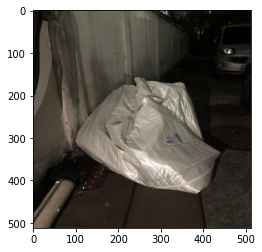

In [4]:
coco = COCO(json_path)
image_id = coco.getImgIds(imgIds=21)
image_infos = coco.loadImgs(image_id)[0]

images = cv2.imread(os.path.join(dataset_path, image_infos['file_name']))
images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB).astype(np.float32)
images /= 255.0

plt.imshow(images)

In [5]:
category_names = ['Background', 'Clothing']
def get_classname(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

In [66]:
ann_ids = coco.getAnnIds(imgIds=image_infos['id'])
anns = coco.loadAnns(ann_ids)

# Load the categories in a variable
cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)

masks = np.zeros((image_infos["height"], image_infos["width"]))
# General trash = 1, ... , Cigarette = 10
anns = sorted(anns, key=lambda idx : idx['area'], reverse=True)

for i in range(len(anns)):
    className = get_classname(anns[i]['category_id'], cats)
    pixel_value = category_names.index(className)
    masks[coco.annToMask(anns[i]) == 1] = pixel_value
masks = masks.astype(np.int8)

In [67]:
ran_num = np.random.randint(187)
add_img = add_imgs[0]
add_mask = add_masks[0]

change_mask = np.where(add_mask==10, 0, 1)
change_mask = np.array(change_mask, np.int8)

final_img = cv2.bitwise_and(images, images, mask=change_mask) + add_img
final_mask = cv2.bitwise_and(masks, masks, mask=change_mask) + np.where(add_mask==10, 1, 0)

images = copy.deepcopy(final_img)
masks = copy.deepcopy(final_mask).astype(np.int8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


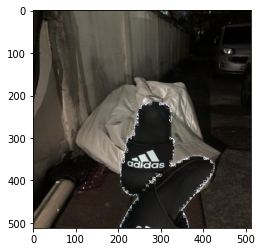

In [68]:
plt.imshow(images)

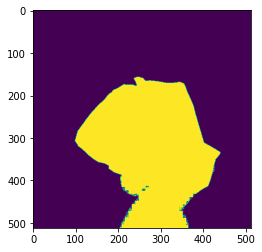

In [69]:
plt.imshow(masks)

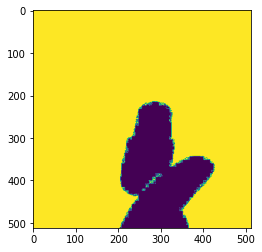

In [70]:
plt.imshow(change_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


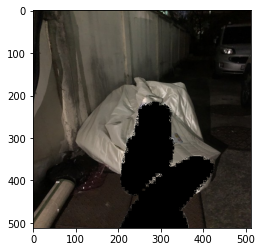

In [11]:
plt.imshow(final_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


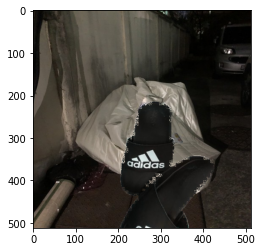

In [12]:
plt.imshow(images)